# Drawdown

First we initilise the data as seen in Week 1 Lab 1

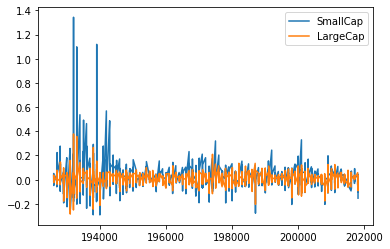

In [10]:
import pandas as pd
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

As you can see when we return the index of the returns (rets) the dates are not a very readbale format

In [3]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

We can fix this by converting them to a better format using pandas built in to_datetime() function, then we you can see the index is in a much better format

In [11]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

And in doing so you can see that the plotted graph has a much better display on the axis

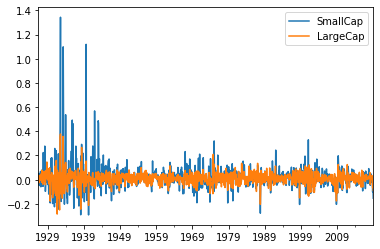

In [7]:
rets.plot.line()

As we are doing the dates there's no need to keep the day field in the index and so we can remove it

In [12]:
rets.index = rets.index.to_period('M')
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

From here if we outout the head you are able to see the formatted data

In [13]:
rets.head()

SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270

Using the data set up in this way we are able to output a secific year such as the following

In [15]:
rets['1975']

SmallCap  LargeCap
1975-01    0.3202    0.1286
1975-02    0.0657    0.0613
1975-03    0.0989    0.0414
1975-04    0.0288    0.0531
1975-05    0.0811    0.0610
1975-06    0.0779    0.0524
1975-07    0.0218   -0.0703
1975-08   -0.0525   -0.0177
1975-09   -0.0351   -0.0468
1975-10   -0.0009    0.0620
1975-11    0.0129    0.0323
1975-12   -0.0042   -0.0159

We are also able to simply view information about our data, as each row is a month we can see that there are 1110 months of data in this resultset

In [16]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1110 non-null   float64
 1   LargeCap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


# Compute Drawdown

To compute the drawdown the first thing we are going to need is the wealth index, we can compute that for our resultset by using the cumprod() function which returns the comulative product over a DataFrame or Seriesaxis

In [17]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

We are able to plot this wealth index over time

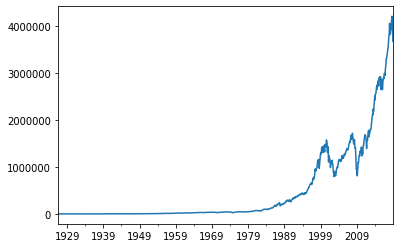

In [18]:
wealth_index.plot.line()

We are also able to return the cummulative max over time using the cummax() function which then plotted returns the following chart, as you can see it only shows all time peaks

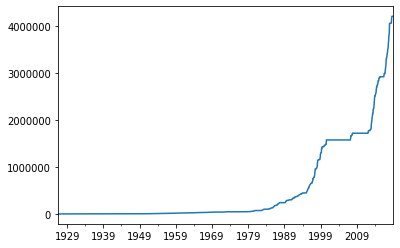

In [21]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot.line()

The drawdown is calculated by taking the previous peaks and the following lowest points and using them to calculate loss of wealth. If you were to buy at that peak and then sell at it's lowest point how much of your wealth would you have lost. You can see from the chart in the early 1930s the maximum drawdown will have meant you lost more than 80% of your wealth

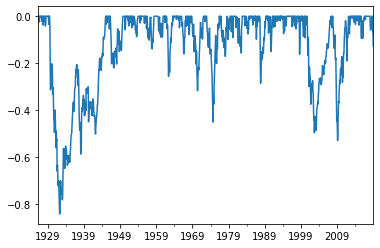

In [22]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot.line()

We are also able to visualise the drawdown monthly in table format

In [23]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

We can display the worst drawdown within our resultset, as you can see it will have been a wealth loss of 84%

In [24]:
drawdown.min()

-0.8400375277943123

We can also get the time period of the the worst drawdown since or up to a given date, the worst drawdown since 1975 being in february 2009 shortly after the 2008 financial crisis

In [25]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

We are able to move this into a function and then pass in the data we would like to check, we initialised the smallcap and largecap at the start of this file detailing what they are in Week 1 Lab 1.

In [26]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a dateaframe that contains:
    the wealth index
    previous peaks
    percent dropdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks =wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        'Wealth':wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

We are then able to pass in the data we wish to chek the drawdown for

In [27]:
drawdown(rets['LargeCap']).head()

Wealth        Peaks  Drawdown
1926-07  1032.900000  1032.900000    0.0000
1926-08  1071.117300  1071.117300    0.0000
1926-09  1078.293786  1078.293786    0.0000
1926-10  1052.091247  1078.293786   -0.0243
1926-11  1080.497711  1080.497711    0.0000

We are able to plot the wealth index against the peaks removing the drawdown from the dataset and it shows the difference between them

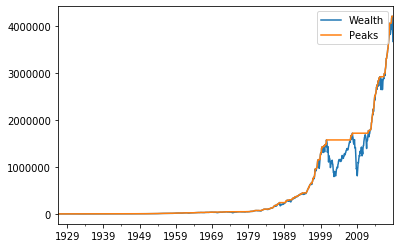

In [29]:
drawdown(rets['LargeCap'])[['Wealth', 'Peaks']].plot()

From the chart above it seems that from 1929 to the late 70s nothing was occuring but we can see if we plot pre-1950s data that in fact there was a lot occuring, remember the largest percentage loss of wealth was in the early 1930s

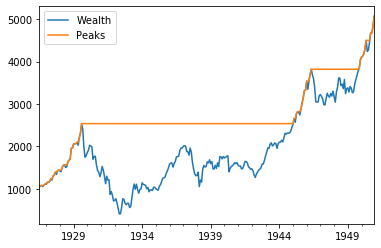

In [30]:
drawdown(rets[:'1950']['LargeCap'])[['Wealth', 'Peaks']].plot()

Using all of the above we can get some very interesting pieces of data

In [31]:
drawdown(rets["LargeCap"])['Drawdown'].min()

-0.8400375277943123

In [32]:
drawdown(rets["SmallCap"])['Drawdown'].min()

-0.8330007793945303

In [33]:
drawdown(rets["LargeCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [34]:
drawdown(rets["SmallCap"])['Drawdown'].idxmin()

Period('1932-05', 'M')

In [37]:
drawdown(rets['1940':]["LargeCap"])['Drawdown'].min()

-0.5280945042309305

In [38]:
drawdown(rets['1940':]["SmallCap"])['Drawdown'].min()

-0.7000596091967917

In [39]:
drawdown(rets['1975':]["LargeCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')

In [40]:
drawdown(rets['1975':]["SmallCap"])['Drawdown'].idxmin()

Period('2009-02', 'M')